In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure
import seaborn as sns
import plotly.express as px

In [ ]:
data_cc=pd.read_csv('BankChurners.csv')
data_cc.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# Cleansing Data

In [ ]:
#menampilkan jumlah baris dan kolom suatu data
#menampilkan info tipe data
data_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
#menampilkan jumlah data unik/ditinct dari setiap kolom
data_cc['CLIENTNUM'].nunique()

10127

Jumlah row data sama dengan jumlah unique clientum row. Yang artinya bahwa tidak ada data duplikat pada data pelanggan kartu kredit

In [ ]:
#menghitung berapa banyak nilai null dari kolom suatu data
data_cc.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [ ]:
#menghapus 2 kolom terakhir yang tidak di pergunakan pada data pelanggan kartu kredit
data_cc.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)

In [ ]:
#mengubah Income_Category menjadi integer agar dapat digunakan untuk analisis
#Unknown = 0
#Less than $40K = 1
#$40K - $60K = 2
#$60K - $80K = 3
#$80K - $120K = 4
#$120K = 5
data_cc['Income_Category'] = data_cc['Income_Category'].replace(['$60K - $80K','Less than $40K','$80K - $120K','$40K - $60K','$120K +','Unknown'],[3,1,4,2,5,0])

In [ ]:
data_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  int64  
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
#menampilkan statistik deskriptif dari dataframe
data_cc.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Income_Category,10127.0,2.085711e+00,1.474639e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03


In [ ]:
#melihat nilai korelasi data
data_cc.corr()

,CLIENTNUM,Customer_Age,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.007613,0.006772,0.026295,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266
Customer_Age,0.007613,1.000000,-0.122254,0.023508,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,0.006772,-0.122254,1.000000,0.066278,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Income_Category,0.026295,0.023508,0.066278,1.000000,0.022122,-0.003202,-0.016310,0.023113,0.475972,0.034718,0.472760,0.011352,0.019651,-0.054569,-0.012657,-0.246476
Months_on_book,0.134588,0.788912,-0.103062,0.022122,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,0.006907,-0.010931,-0.039076,-0.003202,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.005729,0.054361,-0.010768,-0.016310,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,0.005694,-0.018452,-0.040505,0.023113,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.005708,0.002476,0.068065,0.475972,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.000825,0.014780,-0.002688,0.034718,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022


# Visualisasi

Count of Customers Attrition

In [ ]:
Att_Flag=data_cc.groupby(by='Attrition_Flag')['Attrition_Flag'].agg('count').sort_values(ascending=False)
Att_Flag

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

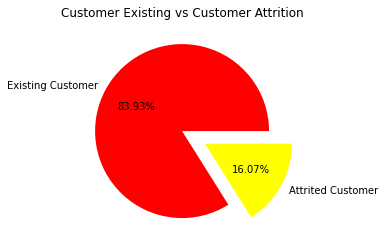

In [ ]:
plt.pie(Att_Flag,labels=Att_Flag.index,autopct='%1.2f%%' ,explode=[0,0.3], colors=['Red','Yellow'])
plt.title('Customer Existing vs Customer Attrition')
plt.show()

#autopct digunakan untuk menampilkan persentase pada setiap potongan dgn parameter yang digunakan 2 angka dibelakang koma


Attrition Flag Vs Gender

In [ ]:
pd.pivot_table(data_cc, 'Customer_Age','Gender',aggfunc=['count'], margins=True).style.background_gradient(vmin=0)

,count
,Customer_Age
Gender,
F,5358
M,4769
All,10127


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


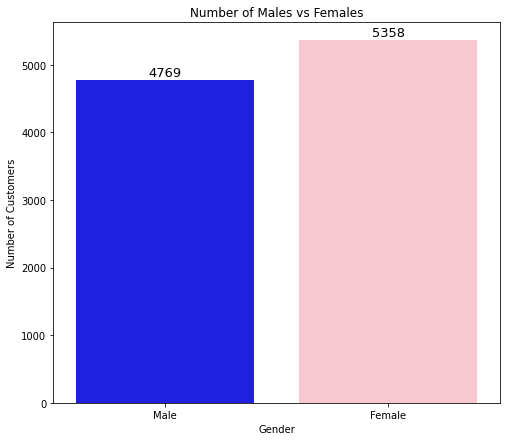

In [ ]:
plt.figure(figsize=(8, 7))
plots= sns.countplot(data_cc['Gender'], palette=['blue', 'pink']);
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '1.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0,8),
                   textcoords='offset points')
plt.title('Number of Males vs Females')
plt.xticks(ticks=[0,1], labels= ['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

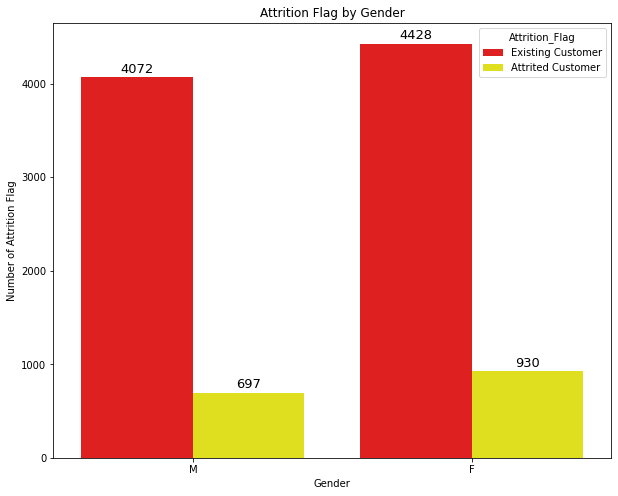

In [ ]:

fig, ax = plt.subplots(figsize=(10,8))
plots=sns.countplot(x ='Gender', hue = 'Attrition_Flag', data = data_cc, palette=['Red','Yellow'])
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '1.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0,8),
                   textcoords='offset points')
plt.xlabel('Gender')
plt.ylabel('Number of Attrition Flag')
plt.title('Attrition Flag by Gender')
plt.show()

# Insight :
1. Dapat dilihat bahwa banyaknya jumlah customer atau pelanggan kartu kredit yang pergi (customer attrition) sebesar 16.07% dari total keseluruhan pelanggan kartu kredit.
2. Jumlah existing customer atau pelanggan tetap yang masih ada berjumlah 8500 customers atau sebanyak 83.93%.
3. lebih banyak pelanggan wanita untuk kartu kredit dibanding pelanggan bergender pria
4. Jika dilihat dari berdasarkan jenis customer, maka existing customer yang sebanyak 8500 terdiri dari 4.428 customer wanita dan 4.072 customer pria. Sedangkan untuk customer attrition yang sebanyak 1.627 terdiri dari 930 customer wanit dan 697 customer pria

Attrition Flag Vs Age

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


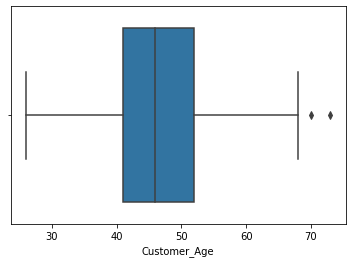

In [ ]:
sns.boxplot(data_cc.Customer_Age)

In [ ]:
fig = px.histogram(data_cc, x='Customer_Age', title = 'Customer Age Distribution',color='Gender')
fig.update_layout(bargap=0.2)
fig.show()

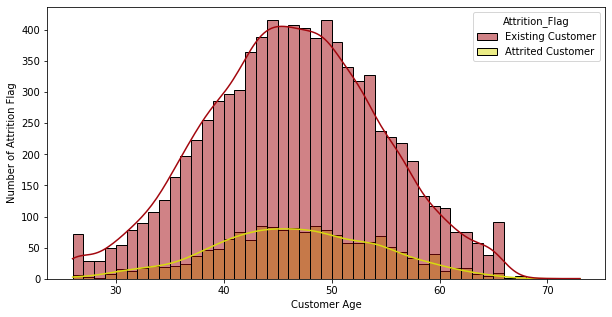

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.histplot(data=data_cc, x='Customer_Age', hue='Attrition_Flag',kde=True, palette=['#a3070e','#d8db0f']);
plt.xlabel('Customer Age')
plt.ylabel('Number of Attrition Flag')
plt.show()

# Insight :
1. Usia customer atau pelanggan secara umum antara 35-55 tahun. Customer paruh baya merupakan customer terbanyak pengguna kartu kredit. Dengan cara ini, bank dapat memberikan penawaran khusus untuk pelanggan ini untuk dapat mempertahankan para pelanggan agar tetap menjadi existing customer.
2. Terdapat outlier pada usia diatas 60. 
3. Jika kita cek kategori usia, customer wanita tetap lebih banyak dibandingkan customer pria.

Attrition Flag Vs Education Level

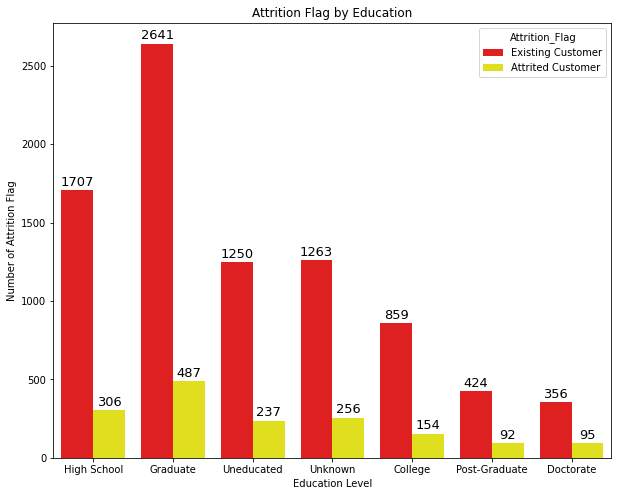

In [ ]:

fig, ax = plt.subplots(figsize=(10,8))
plots=sns.countplot(x ='Education_Level', hue = 'Attrition_Flag', data = data_cc, palette=['Red','Yellow'])
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '1.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0,8),
                   textcoords='offset points')
plt.xlabel('Education Level')
plt.ylabel('Number of Attrition Flag')
plt.title('Attrition Flag by Education')
plt.show()

In [ ]:
fig = px.histogram(data_cc, x='Income_Category', title = 'Income Category by Attration',color='Attrition_Flag')
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
fig = px.histogram(data_cc, x='Income_Category', title = 'Income Category by Education',color='Education_Level')
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
fig = px.histogram(data_cc, x="Income_Category", title = "Income Category Distribution",color="Gender")
fig.update_layout(bargap=0.5)
fig.show()

# Insight :
1. Customer kartu kredit dengan tingkat pendidikan "Sarjana" merupakan customer terbanyak yang artinya bahwa sebagian besar customer dapat mengetahui dasar-dasar pengetahuan tentang manfaat penggunaan kartu kredit
2.Pelanggan kartu kredit terbanyak dimiliki oleh customer dengan kategori pendapat yang kurang dari 40ribu dollar(Less than $40K)
3. Disetiap kategori pendapatan, pelanggan terbanyak dimiliki oleh pendidikan Sarjana
4. kategori pendapatan tertinggi hanya dimiliki oleh pelanggan Pria. Artinya pelangga pria memiliki pendapat yang jauh lebih besar dibanding wanita